In [1]:
from kervis.utils import Model
from kervis.utils import Dataset
from kervis.kernels import ShortestPath, Graphlet, VertexHistogram, EdgeHistogram

In [2]:
dataset = Dataset("MUTAG")

In [3]:
from kervis.utils import fetch_dataset
dataset = fetch_dataset("MUTAG", verbose=False)

In [4]:
SP = Model("MUTAG", EdgeHistogram, "SVM")

Accuracy for MUTAG is 0.7894736842105263


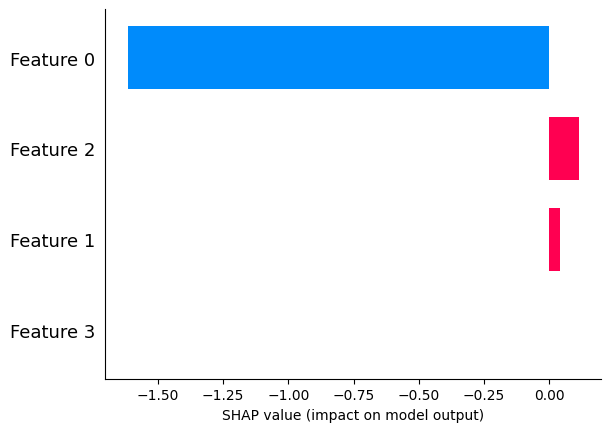

In [5]:
SP.bar_plot(0)

In [6]:
SP.kernel.attributes

[]

In [7]:
import networkx as nx

shap_feature = 43
graph_index = 0
paths = [(path[0],path[1].keys()[0]) for path in nx.all_pairs_shortest_path_length(SP.dataset.graphs[graph_index]) if list(path[1].values())[0] == SP.kernel.attributes[shap_feature][2]]
paths

IndexError: list index out of range

In [ ]:
paths = [path for path in nx.all_pairs_shortest_path_length(SP.dataset.graphs[graph_index])]

In [ ]:
paths[0][1].values()

dict_values([0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 9, 9])